# World Cup Prediction

In [1]:
%matplotlib inline

In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc

In [3]:
rankings = pd.read_csv('C:\Users\ZhangYue\Desktop\worldcup\\fifa_ranking.csv')
rankings = rankings.loc[:,['rank', 'country_full', 'country_abrv', 'cur_year_avg_weighted', 'rank_date', 
                           'two_year_ago_weighted', 'three_year_ago_weighted']]
rankings = rankings.replace({"IR Iran": "Iran"})
rankings['weighted_points'] =  rankings['cur_year_avg_weighted'] + rankings['two_year_ago_weighted'] + rankings['three_year_ago_weighted']
rankings['rank_date'] = pd.to_datetime(rankings['rank_date'])

In [6]:
rankings.head()

,rank,country_full,country_abrv,cur_year_avg_weighted,rank_date,two_year_ago_weighted,three_year_ago_weighted,weighted_points
0,1,Germany,GER,0,1993-08-08,0,0,0
1,2,Italy,ITA,0,1993-08-08,0,0,0
2,3,Switzerland,SUI,0,1993-08-08,0,0,0
3,4,Sweden,SWE,0,1993-08-08,0,0,0
4,5,Argentina,ARG,0,1993-08-08,0,0,0


In [4]:
matches = pd.read_csv('C:\Users\ZhangYue\Desktop\worldcup\\results.csv')
matches =  matches.replace({'Germany DR': 'Germany', 'China': 'China PR'})
matches['date'] = pd.to_datetime(matches['date'], format='%Y-%m-%d')

In [10]:
matches.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30 00:00:00,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08 00:00:00,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07 00:00:00,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06 00:00:00,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04 00:00:00,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
world_cup = pd.read_csv('C:\Users\ZhangYue\Desktop\worldcup\World Cup 2018 Dataset.csv')
world_cup = world_cup.loc[:, ['Team', 'Group', 'First match \nagainst', 'Second match\n against', 'Third match\n against']]
world_cup = world_cup.dropna(how='all')
world_cup = world_cup.replace({"IRAN": "Iran", 
                               "Costarica": "Costa Rica", 
                               "Porugal": "Portugal", 
                               "Columbia": "Colombia", 
                               "Korea" : "Korea Republic"})

In [12]:
world_cup.head()

,Team,Group,First match against,Second match against,Third match against
0,Russia,A,Saudi Arabia,Egypt,Uruguay
1,Saudi Arabia,A,Russia,Uruguay,Egypt
2,Egypt,A,Uruguay,Russia,Saudi Arabia
3,Uruguay,A,Egypt,Saudi Arabia,Russia
4,Portugal,B,Spain,Morocco,Iran


#### The main training set is matches, and let's check what kind of tournaments we have(test set is world cup this year)

In [13]:
matches['tournament'].unique()

array(['Friendly', 'British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa Am\xc3\xa9rica', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'CCCF Championship',
       'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pac\xc3\xadfico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'CONCACAF Championship',
       'Copa Juan Pinto Dur\xc3\xa1n', 'UAFA Cup', 'South Pacific Games',
       'CONCACAF Cham

#### Delele friendship tournament

In [6]:
matches = matches[matches['tournament'] != 'Friendly']
matches.shape

(22580, 9)

#### For rankings and matches(rankings points only starts after 2011-08-24), use data after year 2011-08-24

In [15]:
import datetime

In [25]:
rankings['year'] = rankings['rank_date'].dt.year
matches['year'] = matches['date'].dt.year

rankings_sub = rankings[rankings['rank_date'] > '2011-08-24']
matches_sub = matches[matches['date'] > '2011-08-24']

In [20]:
print rankings_sub.columns
print matches_sub.columns  # 3914 matches

Index([u'rank', u'country_full', u'country_abrv', u'cur_year_avg_weighted',
       u'rank_date', u'two_year_ago_weighted', u'three_year_ago_weighted',
       u'weighted_points', u'year'],
      dtype='object')
Index([u'date', u'home_team', u'away_team', u'home_score', u'away_score',
       u'tournament', u'city', u'country', u'neutral', u'year'],
      dtype='object')


#### Steps:
    1. Drop redundunt columns and group average points by year
    2. Merge matches and rankings by year

In [22]:
rankings_sub.head()

,rank,country_full,country_abrv,cur_year_avg_weighted,rank_date,two_year_ago_weighted,three_year_ago_weighted,weighted_points,year
40585,1,Spain,ESP,656.13,2011-09-21,237.69,207.45,1101.27,2011
40586,2,Netherlands,NED,727.05,2011-09-21,239.62,122.57,1089.24,2011
40587,3,Germany,GER,557.21,2011-09-21,148.20,123.85,829.26,2011
40588,4,Uruguay,URU,589.71,2011-09-21,111.01,91.07,791.79,2011
40589,5,Portugal,POR,638.67,2011-09-21,125.09,98.40,862.16,2011


In [26]:
rankings_sub = rankings_sub[['rank', 'country_full', 'weighted_points', 'year']]

In [29]:
rankings_sub = rankings_sub.groupby(['year', 'country_full'], as_index=False).agg({'rank': 'mean', 'weighted_points': 'mean'})

In [30]:
matches_sub.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
32808,2011-08-27,Fiji,Tahiti,3,0,South Pacific Games,Boulari,New Caledonia,True,2011
32810,2011-08-27,New Caledonia,Vanuatu,5,0,South Pacific Games,Nouméa,New Caledonia,False,2011
32812,2011-08-27,Papua New Guinea,Cook Islands,4,0,South Pacific Games,Boulari,New Caledonia,True,2011
32813,2011-08-27,Solomon Islands,Guam,7,0,South Pacific Games,Nouméa,New Caledonia,True,2011
32814,2011-08-27,Tuvalu,American Samoa,4,0,South Pacific Games,Nouméa,New Caledonia,True,2011


#### Merge data

In [38]:
matches_all = matches_sub.merge(rankings_sub, left_on=['home_team', 'year'], right_on=['country_full', 'year'], how='inner')
matches_all = matches_all.merge(rankings_sub, left_on=['away_team', 'year'], right_on=['country_full', 'year'], how='inner')
matches_all.drop(['date', 'tournament', 'city', 'country', 'year', 'country_full_x', 'country_full_y'], axis=1, inplace=True)
matches_all.head()

,home_team,away_team,home_score,away_score,neutral,weighted_points_x,rank_x,weighted_points_y,rank_y
0,Fiji,Tahiti,3,0,True,145.7750,153.75,64.9125,183
1,New Caledonia,Tahiti,3,1,False,118.6800,160.00,64.9125,183
2,New Caledonia,Vanuatu,5,0,False,118.6800,160.00,92.0500,173
3,American Samoa,Vanuatu,0,8,True,15.1775,199.00,92.0500,173
4,Guam,Vanuatu,1,4,True,35.8500,188.50,92.0500,173


#### Get(Home - Away):
    1. weighted difference
    2. rank difference
    3. one-hot-encode neutral
    4. target

In [40]:
matches_all.head()

,home_team,away_team,home_score,away_score,neutral,weighted_points_x,rank_x,weighted_points_y,rank_y,is_win
0,Fiji,Tahiti,3,0,True,145.7750,153.75,64.9125,183,1
1,New Caledonia,Tahiti,3,1,False,118.6800,160.00,64.9125,183,1
2,New Caledonia,Vanuatu,5,0,False,118.6800,160.00,92.0500,173,1
3,American Samoa,Vanuatu,0,8,True,15.1775,199.00,92.0500,173,0
4,Guam,Vanuatu,1,4,True,35.8500,188.50,92.0500,173,0


In [45]:
matches_all['weighted_diff'] = matches_all['weighted_points_x'] - matches_all['weighted_points_y']
matches_all['rank_diff'] = matches_all['rank_x'] - matches_all['rank_y']
matches_all['neutral'] = matches_all['neutral'].astype(int)
matches_all['is_win'] = (matches_all['home_score'] - matches_all['away_score']).apply(lambda x: 1 if x>0 else 0)
train = matches_all.drop(['home_team', 'away_team', 'home_score', 'away_score'], axis=1)

In [46]:
train.head()

,neutral,weighted_points_x,rank_x,weighted_points_y,rank_y,is_win,weighted_diff,rank_diff
0,1,145.7750,153.75,64.9125,183,1,80.8625,-29.25
1,0,118.6800,160.00,64.9125,183,1,53.7675,-23.00
2,0,118.6800,160.00,92.0500,173,1,26.6300,-13.00
3,1,15.1775,199.00,92.0500,173,0,-76.8725,26.00
4,1,35.8500,188.50,92.0500,173,0,-56.2000,15.50


In [47]:
train_X = train.drop('is_win', axis=1)
train_y = train['is_win']

#### Modelling
    1. Logistic Regression
    2. Random Forest
    3. LightGBM

In [58]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

In [59]:
classifiers = {'Random Forest': RandomForestClassifier(n_estimators=300),
              'LightGBM': LGBMClassifier(n_estimators=300, learning_rate=.01),
              'Logistic Regression': LogisticRegression(C=1e-5)}

Running LightGBM
Running Random Forest
Running Logistic Regression


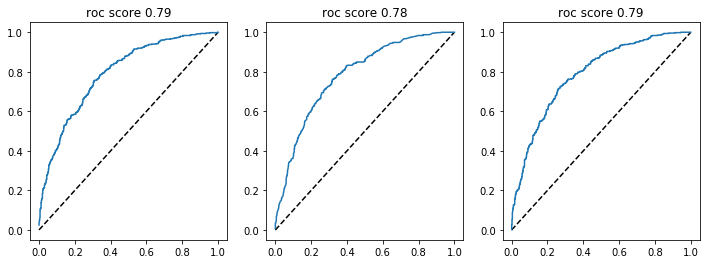

In [67]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.3)

fig = plt.figure(figsize=[12, 4])
for i, (name, clf) in enumerate(classifiers.items()):
    print 'Running', name
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    # plot
    ax = fig.add_subplot(1, 3, i+1)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.plot(fpr, tpr)
    ax.set_title('roc score {0:.2f}'.format(roc_auc_score(y_test, y_pred)))

##### Not bad
Check how higher probability relate to wining

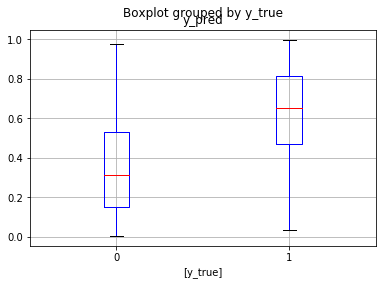

In [71]:
pd.DataFrame({'y_pred': y_pred, 'y_true': y_test}).boxplot(by='y_true')

#### Do prediction by averaging 3 models

In [72]:
rf = RandomForestClassifier(n_estimators=300)
rf = rf.fit(train_X, train_y)

lr = LogisticRegression(C=1e-5)
lr = lr.fit(train_X, train_y)

lgb = LGBMClassifier(n_estimators=300, learning_rate=.01)
lgb = lgb.fit(train_X, train_y)

#### Group Stage Simulation
Strong team not always wins, higher probability only gives better wining chance.

In [88]:
world_cup_rankings = world_cup[['Team', 'Group']]
world_cup_rankings = world_cup_rankings.merge(rankings_sub[rankings_sub['year']==2018], left_on='Team', right_on='country_full')
world_cup_rankings.drop('country_full', axis=1, inplace=True)
world_cup_rankings = world_cup_rankings.set_index('Team')
world_cup_rankings.head()

C:\Users\ZhangYue\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Group,Points,year,weighted_points,rank
Team,,,,,
Russia,A,0,2018,417.961667,64.666667
Saudi Arabia,A,0,2018,313.558333,67.000000
Egypt,A,0,2018,408.813333,42.333333
Uruguay,A,0,2018,682.571667,19.000000
Portugal,B,0,2018,1005.245000,3.500000


In [167]:
world_cup_rankings['Points'] = 0
for group in world_cup_rankings['Group'].unique():
    print '*******************************'
    print 'Simulating Group', group
    group_teams = list(world_cup_rankings.query('Group=="{}"'.format(group)).index)
    for home, away in combinations(group_teams, 2):
        print '########################'
        print '{} vs {}'.format(home, away)
        row = pd.DataFrame(columns=train_X.columns)
        row.loc[0, 'neutral'] = 1
        row['weighted_points_x'] = world_cup_rankings.loc[home, 'weighted_points']
        row['rank_x'] = world_cup_rankings.loc[home, 'rank']
        row['weighted_points_y'] = world_cup_rankings.loc[away, 'weighted_points']
        row['rank_y'] = world_cup_rankings.loc[away, 'rank']
        row['weighted_diff'] = row['weighted_points_x'] - row['weighted_points_y']
        row['rank_diff'] = row['rank_x'] - row['rank_y']
        # get wining probability
        y_pred = np.mean([lr.predict_proba(row)[:, 1][0], lgb.predict_proba(row.values)[:, 1][0], rf.predict_proba(row)[:, 1][0]])
        # if y_pred in [0.4, 0.55] then draw
        if (y_pred > 0.4) & (y_pred < 0.55):
            print 'Draw'
            world_cup_rankings.loc[home, 'Points'] += 1
            world_cup_rankings.loc[away, 'Points'] += 1
        else:
            # give a sense of randomness
            is_win = np.random.choice([1, 0], p=[y_pred, 1-y_pred])
            if is_win:
                world_cup_rankings.loc[home, 'Points'] += 3
                print '{} wins!'.format(home)
            else:
                world_cup_rankings.loc[away, 'Points'] += 3
                print '{} wins!'.format(away)

*******************************
Simulating Group A
########################
Russia vs Saudi Arabia
Draw
########################
Russia vs Egypt
Egypt wins!
########################
Russia vs Uruguay
Uruguay wins!
########################
Saudi Arabia vs Egypt
Egypt wins!
########################
Saudi Arabia vs Uruguay
Uruguay wins!
########################
Egypt vs Uruguay
Uruguay wins!
*******************************
Simulating Group B
########################
Portugal vs Spain
Spain wins!
########################
Portugal vs Morocco
Portugal wins!
########################
Portugal vs Iran
Portugal wins!
########################
Spain vs Morocco
Spain wins!
########################
Spain vs Iran
Spain wins!
########################
Morocco vs Iran
Iran wins!
*******************************
Simulating Group C
########################
France vs Australia
France wins!
########################
France vs Peru
France wins!
########################
France vs Denmark
Denmark wins!
#########

#### View the points after group stage

In [168]:
world_cup_rankings

,Group,Points,year,weighted_points,rank
Team,,,,,
Russia,A,1,2018,417.961667,64.666667
Saudi Arabia,A,1,2018,313.558333,67.000000
Egypt,A,6,2018,408.813333,42.333333
Uruguay,A,9,2018,682.571667,19.000000
Portugal,B,6,2018,1005.245000,3.500000
Spain,B,9,2018,912.925000,7.333333
Morocco,B,0,2018,504.263333,41.333333
Iran,B,3,2018,520.541667,34.833333
France,C,6,2018,755.330000,8.000000


#### Single Elimination Rounds Simulation

In [225]:
final_teams = world_cup_rankings.sort_values(by=['Group', 'Points'], ascending=False).reset_index()
final_teams = final_teams.groupby('Group').apply(lambda x: x.iloc[[0, 1]]).reset_index(drop=True)
final_teams.set_index('Team', inplace=True)
final_teams

,Group,Points,year,weighted_points,rank
Team,,,,,
Uruguay,A,9,2018,682.571667,19.000000
Egypt,A,6,2018,408.813333,42.333333
Spain,B,9,2018,912.925000,7.333333
Portugal,B,6,2018,1005.245000,3.500000
Denmark,C,9,2018,926.571667,12.000000
France,C,6,2018,755.330000,8.000000
Argentina,D,7,2018,867.560000,4.500000
Croatia,D,4,2018,706.773333,16.833333
Switzerland,E,7,2018,851.685000,7.000000


#### Pairing Rules

In [208]:
pairing = [0, 3, 4, 7, 1, 2, 5, 6, 8, 11, 12, 15, 9, 10, 13, 14]

#### Simulation

In [226]:
final_teams = final_teams.iloc[pairing]

In [227]:
finals = ['round_of_16', 'quarterfinal', 'semifinal', 'final']
for f in finals:
    print '######################################'
    print 'Simulation of {}'.format(f)
    winners = []
    rds = int(len(final_teams)/2)
    for i in range(rds):
        home = final_teams.index[2*i]
        away = final_teams.index[2*i+1]
        print '{} vs {}'.format(home, away)
        row = pd.DataFrame(columns=train_X.columns)
        row.loc[0, 'neutral'] = 1
        row['weighted_points_x'] = final_teams.loc[home, 'weighted_points']
        row['rank_x'] = final_teams.loc[home, 'rank']
        row['weighted_points_y'] = final_teams.loc[away, 'weighted_points']
        row['rank_y'] = final_teams.loc[away, 'rank']
        row['weighted_diff'] = row['weighted_points_x'] - row['weighted_points_y']
        row['rank_diff'] = row['rank_x'] - row['rank_y']
        # get wining probability
        y_pred = np.mean([lr.predict_proba(row)[:, 1][0], lgb.predict_proba(row.values)[:, 1][0], rf.predict_proba(row)[:, 1][0]])
       
        # give a sense of randomness
        is_win = np.random.choice([1, 0], p=[y_pred, 1-y_pred])
        if is_win:
            winners.append(home)
            print '{} wins!'.format(home)
        else:
            winners.append(away)
            print '{} wins!'.format(away)
    final_teams = final_teams.loc[winners]
print '*******************************'
print 'The Champion of 2018 World Cup is {}!!!!!!!!!!!!!!!!!!!!!!!'.format(winners[0])

######################################
Simulation of round_of_16
Uruguay vs Portugal
Portugal wins!
Denmark vs Croatia
Croatia wins!
Egypt vs Spain
Egypt wins!
France vs Argentina
Argentina wins!
Switzerland vs Germany
Germany wins!
England vs Poland
England wins!
Serbia vs Sweden
Sweden wins!
Belgium vs Colombia
Belgium wins!
######################################
Simulation of quarterfinal
Portugal vs Croatia
Portugal wins!
Egypt vs Argentina
Argentina wins!
Germany vs England
Germany wins!
Sweden vs Belgium
Belgium wins!
######################################
Simulation of semifinal
Portugal vs Argentina
Argentina wins!
Germany vs Belgium
Belgium wins!
######################################
Simulation of final
Argentina vs Belgium
Belgium wins!
*******************************
The Champion of 2018 World Cup is Belgium!!!!!!!!!!!!!!!!!!!!!!!


#### Simulation Compiling
So one simulation may have some kind of accident, compile the whole simulation process to perform multiple simulations

In [229]:
def pred_wining(dat, home, away):
    row = pd.DataFrame(columns=train_X.columns)
    row.loc[0, 'neutral'] = 1
    row['weighted_points_x'] = dat.loc[home, 'weighted_points']
    row['rank_x'] = dat.loc[home, 'rank']
    row['weighted_points_y'] = dat.loc[away, 'weighted_points']
    row['rank_y'] = dat.loc[away, 'rank']
    row['weighted_diff'] = row['weighted_points_x'] - row['weighted_points_y']
    row['rank_diff'] = row['rank_x'] - row['rank_y']
    
    y_pred = np.mean([lr.predict_proba(row)[:, 1][0], lgb.predict_proba(row.values)[:, 1][0], rf.predict_proba(row)[:, 1][0]])
    return y_pred

In [234]:
num_simulations = 1000
pairing = [0, 3, 4, 7, 1, 2, 5, 6, 8, 11, 12, 15, 9, 10, 13, 14]
finals = ['round_of_16', 'quarterfinal', 'semifinal', 'final']

In [241]:
def main():
    # Group Stage
    world_cup_rankings['Points'] = 0
    for group in world_cup_rankings['Group'].unique():
        group_teams = list(world_cup_rankings.query('Group=="{}"'.format(group)).index)
        for home, away in combinations(group_teams, 2):
            # get wining probability
            y_pred = pred_wining(world_cup_rankings, home, away)
            # if y_pred in [0.4, 0.55] then draw
            if (y_pred > 0.4) & (y_pred < 0.55):
                world_cup_rankings.loc[home, 'Points'] += 1
                world_cup_rankings.loc[away, 'Points'] += 1
            else:
                # give a sense of randomness
                is_win = np.random.choice([1, 0], p=[y_pred, 1-y_pred])
                if is_win:
                    world_cup_rankings.loc[home, 'Points'] += 3
                else:
                    world_cup_rankings.loc[away, 'Points'] += 3
    # Eliminating Stage
    final_teams = world_cup_rankings.sort_values(by=['Group', 'Points'], ascending=False).reset_index()
    final_teams = final_teams.groupby('Group').apply(lambda x: x.iloc[[0, 1]]).reset_index(drop=True)
    final_teams.set_index('Team', inplace=True)
    final_teams = final_teams.iloc[pairing]
    
    for f in finals:
        winners = []
        rds = int(len(final_teams)/2)
        for i in range(rds):
            home = final_teams.index[2*i]
            away = final_teams.index[2*i+1]
            y_pred = pred_wining(world_cup_rankings, home, away)
            # give a sense of randomness
            is_win = np.random.choice([1, 0], p=[y_pred, 1-y_pred])
            if is_win:
                winners.append(home)
            else:
                winners.append(away)
        final_teams = final_teams.loc[winners]
    print 'The Champion of 2018 World Cup is {}!!!!!!!!!!!!!!!!!!!!!!!'.format(winners[0])
    return winners[0]

#### Running simulations

In [242]:
if __name__ == '__main__':
    champions = []
    for sim in range(num_simulations):
        print '######## Simulation {} ########'.format(sim+1)
        champions.append(main())

######## Simulation 1 ########
The Champion of 2018 World Cup is Belgium!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 2 ########
The Champion of 2018 World Cup is Spain!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 3 ########
The Champion of 2018 World Cup is Sweden!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 4 ########
The Champion of 2018 World Cup is Germany!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 5 ########
The Champion of 2018 World Cup is Portugal!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 6 ########
The Champion of 2018 World Cup is Germany!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 7 ########
The Champion of 2018 World Cup is Denmark!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 8 ########
The Champion of 2018 World Cup is Belgium!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 9 ########
The Champion of 2018 World Cup is Argentina!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 10 ########
The Champion of 2018 World Cup is Poland!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 11 ########
The Cham

In [245]:
gc.collect()

374

#### Distribution of Wining

In [265]:
from collections import Counter
import operator
import matplotlib

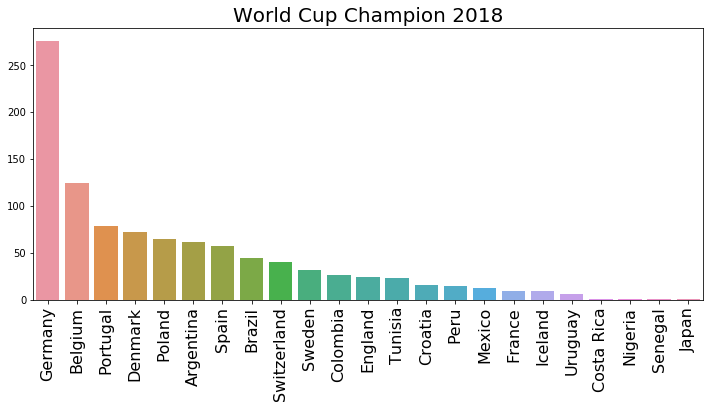

In [270]:
sorted_champ = Counter(champions).most_common()

fig, ax = plt.subplots(figsize=[12, 5])
plt.xticks(rotation=90, size=16)
ax.set_title('World Cup Champion 2018', size=20)
sns.barplot(x=[t[0] for t in sorted_champ], y=[t[1] for t in sorted_champ], ax=ax)

### Reference:
https://www.kaggle.com/agostontorok/soccer-world-cup-2018-winner/notebook